In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
data = yf.download("NVDA MSFT AAPL AVGO CDNS META AMD ASML.AS AMZN MA", start="2014-01-01", end="2024-01-01")

[*********************100%%**********************]  10 of 10 completed


In [3]:
close_prices = data['Close']

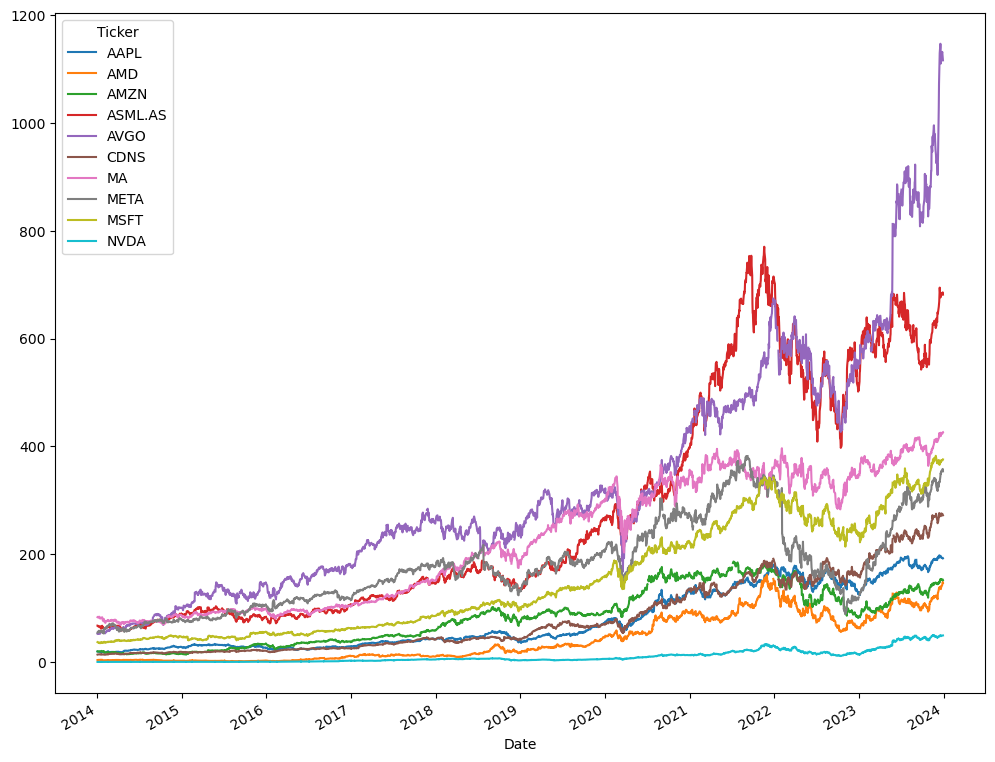

In [4]:
# Plot the close prices
close_prices.plot(figsize=(12, 10))

# Display the plot
plt.show()

In [5]:
percentage_change = close_prices.pct_change(fill_method=None)
percentage_change_stats = percentage_change.describe()
display(percentage_change_stats)

Ticker         AAPL          AMD         AMZN      ASML.AS         AVGO  \
count   2449.000000  2449.000000  2449.000000  2535.000000  2449.000000   
mean       0.001131     0.002137     0.000950     0.001099     0.001503   
std        0.017909     0.036708     0.020956     0.019896     0.022068   
min       -0.128647    -0.242291    -0.140494    -0.122906    -0.199129   
25%       -0.007262    -0.016235    -0.008714    -0.009238    -0.010127   
50%        0.000941     0.000584     0.001043     0.001356     0.001404   
75%        0.010209     0.019704     0.011145     0.011832     0.012843   
max        0.119808     0.522901     0.141311     0.139550     0.158337   

Ticker         CDNS           MA         META         MSFT         NVDA  
count   2449.000000  2449.000000  2449.000000  2449.000000  2449.000000  
mean       0.001397     0.000815     0.000982     0.001115     0.002359  
std        0.019159     0.017325     0.023672     0.017166     0.029352  
min       -0.125981    -0.127255    -0.263901    -0.147390    -0.187559  
25%       -0.007401    -0.007097    -0.009496    -0.006979    -0.011473  
50%        0.001376     0.001349     0.001077     0.000868     0.002290  
75%        0.010523     0.009063     0.012288     0.009921     0.016340  
max        0.153657     0.166109     0.232824     0.142169     0.298067

<Axes: xlabel='Ticker'>

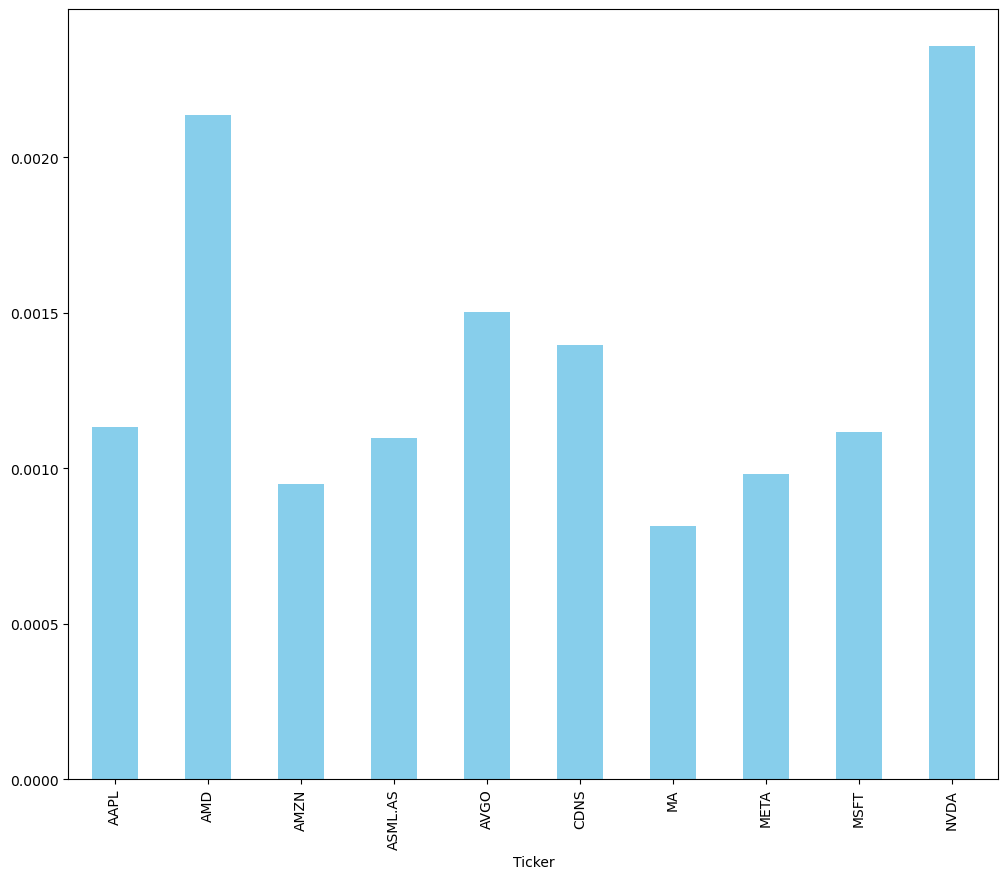

In [6]:
# Extract the mean values
percentage_change_mean = percentage_change_stats.loc['mean']

# Plot the mean values
percentage_change_mean.plot(kind='bar', figsize=(12, 10), color='skyblue')

Ticker           AAPL        AMD      AMZN   ASML.AS       AVGO       CDNS  \
Date                                                                         
2014-01-02        NaN        NaN       NaN       NaN        NaN        NaN   
2014-01-03   0.978034   1.012658  0.996155  0.999852   1.003799   1.011420   
2014-01-06   0.983367   1.045570  0.989095  0.974764   0.996961   1.018558   
2014-01-07   0.976335   1.058228  1.000151  0.966942   1.006458   1.023555   
2014-01-08   0.982518   1.058228  1.009925  0.969599   1.021462   1.029265   
...               ...        ...       ...       ...        ...        ...   
2023-12-22  10.821052  35.266578  6.040209  9.855132  21.909350  19.788570   
2023-12-26  10.790310  36.229082  6.039815       NaN  22.102867  19.726868   
2023-12-27  10.795899  36.901067  6.037059       NaN  21.991171  19.703912   
2023-12-28  10.819934  37.580628  6.038634  9.869521  21.917748  19.603468   
2023-12-29  10.761245  37.239585  5.981941  9.809086  21.797459  19.541050   

Ticker            MA      META       MSFT        NVDA  
Date                                                   
2014-01-02       NaN       NaN        NaN         NaN  
2014-01-03  0.996008  0.997258   0.993272    0.988020  
2014-01-06  0.991069  1.045513   0.972282    1.001261  
2014-01-07  1.003537  1.058673   0.979817    1.017654  
2014-01-08  1.003237  1.064339   0.962325    1.031526  
...              ...       ...        ...         ...  
2023-12-22  5.071309  5.510111  10.653112  111.593881  
2023-12-26  5.066167  5.532563  10.655388  112.620000  
2023-12-27  5.074418  5.579340  10.638608  112.935380  
2023-12-28  5.097855  5.586980  10.673021  113.175341  
2023-12-29  5.100127  5.518998  10.694635  113.175341  

[2582 rows x 10 columns]

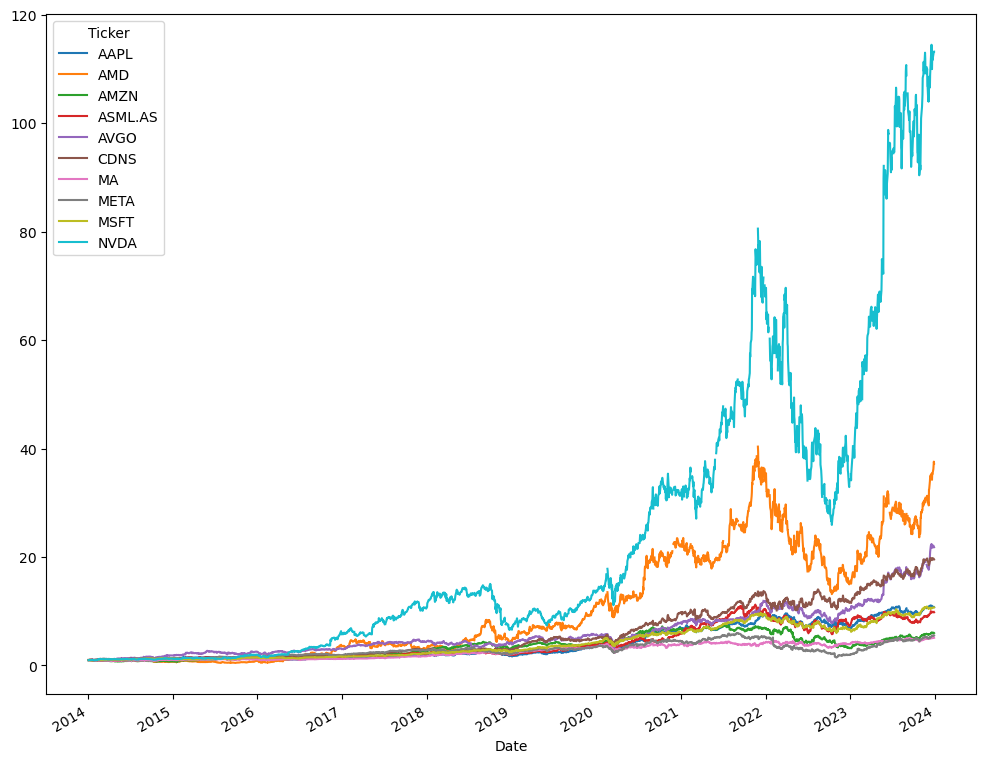

In [7]:
# Calculate the cumulative_returns
cumulative_returns = (percentage_change +1).cumprod()
display(cumulative_returns)

# Plot the cumulative_returns
cumulative_returns.plot(figsize=(12, 10))


# Display the plot
plt.show()

In [8]:
actual_returns = cumulative_returns.loc['2023-12-29']

display()

today_value = 0
for v in actual_returns.values:
    today_value += 10*v

print("An investment of 100 $ at 2014-01-01 equally distributed across these 10 stocks is worth in 2023-12-29: ", today_value)

# The investement is almost 24 times bigger after 10 years

An investment of 100 $ at 2014-01-01 equally distributed across these 10 stocks is worth in 2023-12-29:  2396.1946868657433
